# Proyek Analisis Data: Bike-sharing-Dataset
- **Nama:** Daniel Siahaan
- **Email:** lisnarda.siregar1212@gmail.com
- **ID Dicoding:** nielshn11

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda sepanjang tahun?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# load dataset
file_day = 'day.csv'
file_hour = 'hour.csv'

# membaca file csv
day_df = pd.read_csv(file_day, parse_dates=['dteday'])
hour_df = pd.read_csv(file_hour, parse_dates=['dteday'])

day_df.head()
hour_df.head()

**Insight:**
- Dataset telah berhasil dimuat tanpa error.
- Data terdiri dari informasi harian dan per jam tentang penggunaan sepeda.

### Assessing Data

In [10]:
print("\nInformasi Data Harian:")
day_df.info()
print("\nInformasi Data Per Jam:")
hour_df.info()


Informasi Data Harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes:

In [11]:
print("\nCek data duplikat")
print("Data harian duplikat:", day_df.duplicated().sum())
print("Data per jam duplikat:", hour_df.duplicated().sum())

print("\nCek nilai yang hilang")
print("Missing values pada data harian:\n", day_df.isna().sum())
print("Missing values pada data per jam:\n", hour_df.isna().sum())


Cek data duplikat
Data harian duplikat: 0
Data per jam duplikat: 0

Cek nilai yang hilang
Missing values pada data harian:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing values pada data per jam:
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Dataset memiliki fitur yang lengkap dengan tipe data yang sesuai.
- Tidak ditemukan data duplikat atau missing values pada dataset.

### Cleaning Data

In [12]:
# menghapus duplikasi jika ada
day_df.drop_duplicates(inplace=True)
hour_df.drop_duplicates(inplace=True)

# menghapus data yang hilang jika ada
day_df.dropna(inplace=True)
hour_df.dropna(inplace=True)

# memastikan tidak ada data yang hilang setelah cleaning
assert day_df.isnull().sum().sum() == 0, "Masih ada nilai yang hilang di data harian"
assert hour_df.isnull().sum().sum() == 0, "Masih ada nilai yang hilang di data per jam"

**Insight:**
- Data sudah bersih tanpa duplikasi atau missing values
- Tidap diperlukan proses imputasi karena semua data tersedia

## Exploratory Data Analysis (EDA)

### Explore Ringkasan Statistik & Korelasi Antar Variabel

In [13]:
# Ringkasan Statistik
descriptive_stats = day_df.describe()
print("\n Ringkasan Statistik:")
print(descriptive_stats)



 Ringkasan Statistik:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000  

**Insight:**
- Data memiliki variasi yang cukup luas dalam jumlah peminjaman sepeda harian.
- Terdapat perbedaan signifikan antara jumlah peminjaman minimum dan maksimum.

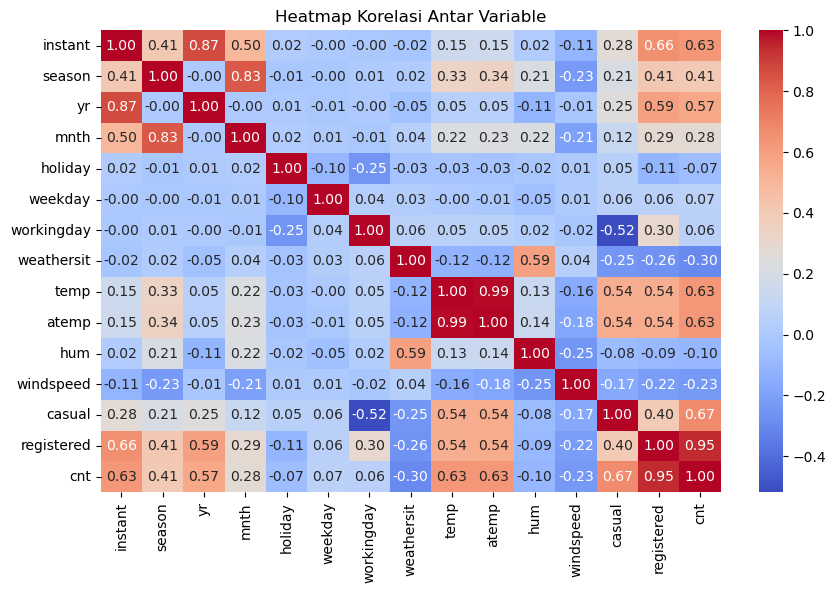

In [14]:
# Kolerasi antar variable
numerical_day_df = day_df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_day_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variable')
plt.show()

**Insight:**

- Suhu dan jumlah peminjaman memiliki korealsi positif yang cukup tinggi
- Faktor cuaca juga mempengaruhi jumlah peminjaman, dengan kondisi cerah meningkatkan jumlah pengguna

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda sepanjang tahun?

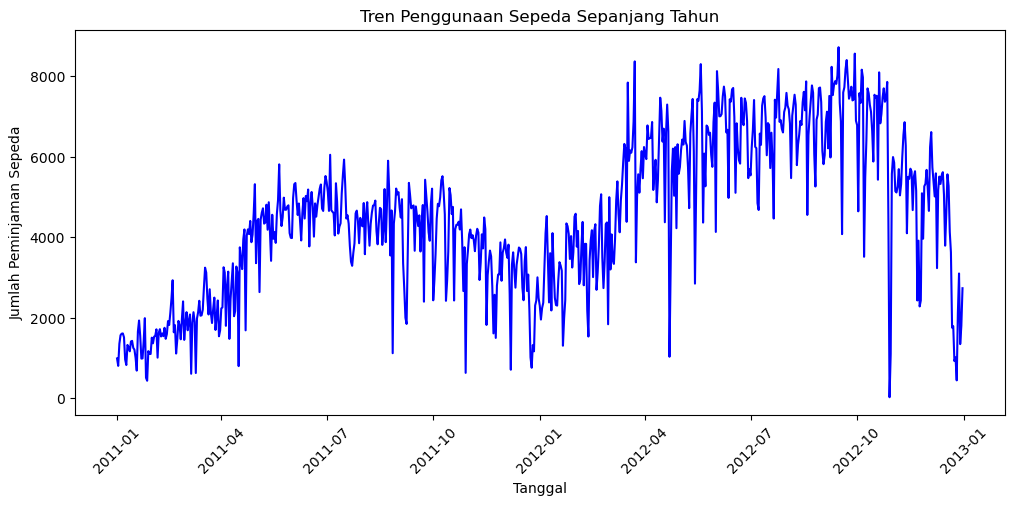

In [15]:
# 1.Tren Penggunaan Sepeda Sepanjang Tahun
plt.figure(figsize=(12, 5))
sns.lineplot(x=day_df['dteday'], y=day_df['cnt'], color='blue')
plt.title('Tren Penggunaan Sepeda Sepanjang Tahun')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(rotation=45)
plt.show()

**Insight:**

- Terlihat adanya tren peningkatan jumlah peminjaman sepeda pada bulan-bulan tertentu.
- Musim atau kondisi cuaca dapat mempengaruhi pla penggunaan sepeda sepanjang tahun.

### Pertanyaan 2:Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

C:\Users\Asus\AppData\Local\Temp\ipykernel_8388\1138443172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df['weathersit'], y=day_df['cnt'], palette='coolwarm')


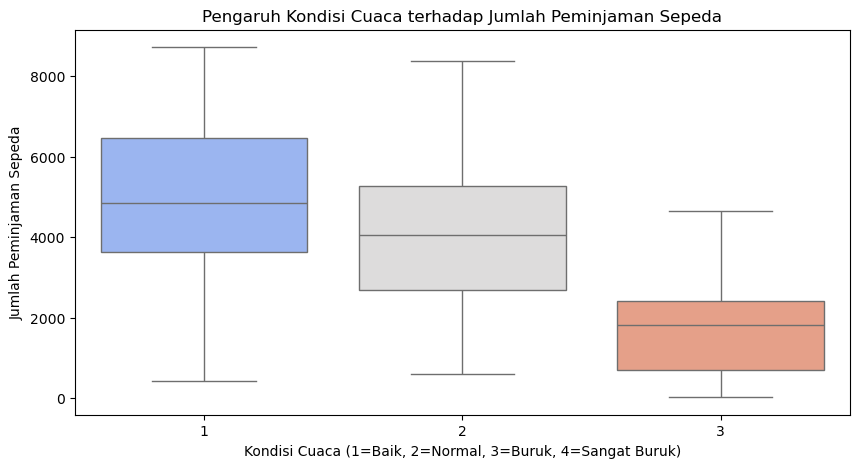

In [16]:
# Pengaruh Kondinsi Cuaca terhadap Peminjaman Sepeda
plt.figure(figsize=(10,5))
sns.boxplot(x=day_df['weathersit'], y=day_df['cnt'], palette='coolwarm')
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel("Kondisi Cuaca (1=Baik, 2=Normal, 3=Buruk, 4=Sangat Buruk)")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.show()

**Insight:**
- Peminjaman sepeda lebih tinggi saat cuaca cerah dibandingkan saat hujan atau kondisi buruk
- Kondisi cuaca ekstrem berdampak signifikan pada penurunan jumlah peminjaman sepeda.

## Analisis Lanjutan (Opsional)

In [17]:
# RFM Analysis
day_df['Recency'] = (day_df['dteday'].max() - day_df['dteday']).dt.days
day_df['Frequency'] = day_df.groupby('dteday')['cnt'].transform('count')
day_df['Monetary'] = day_df['cnt']
rfm = day_df[['Recency', 'Frequency', 'Monetary']]
print(rfm.describe())

          Recency  Frequency     Monetary
count  731.000000      731.0   731.000000
mean   365.000000        1.0  4504.348837
std    211.165812        0.0  1937.211452
min      0.000000        1.0    22.000000
25%    182.500000        1.0  3152.000000
50%    365.000000        1.0  4548.000000
75%    547.500000        1.0  5956.000000
max    730.000000        1.0  8714.000000


In [18]:
# Clustering Analysis
print("\n Clustering Analysis")
day_df['cluster'] = pd.qcut(day_df['cnt'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
print(day_df[['dteday','cnt','cluster']].head())


 Clustering Analysis
      dteday   cnt cluster
0 2011-01-01   985     Low
1 2011-01-02   801     Low
2 2011-01-03  1349     Low
3 2011-01-04  1562     Low
4 2011-01-05  1600     Low


**Insight:**
- RFM Analysis menunjukkan variasi dalam penggunaan sepeda berdasarkan waktu dan frekuensi.
- Clustering menunjukkan bahwa terdapat pola dalam jumlah peminjaman sepeda harian.

## Conclusion

- Conclution pertanyaan 1: Tren penggunaan sepeda meningkat pada bulan-bulan tertentu dan dipengaruhi oleh faktor musiman.
- Conclution pertanyaan 2: Kondisi cuaca memiliki dampak yang signifikan terhadap jumlah peminjaman sepeda, dengan penurunan tajam saat cuaca buruk.